In [248]:
from bagpy import bagreader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from scipy import linalg, integrate
from scipy.signal import butter,filtfilt, detrend

import numpy as np
import math
import scipy

In [249]:
df_gps = pd.read_csv("data_driving/gps.csv",sep=",")
df_imu = pd.read_csv("data_driving/imu.csv",sep=",")

In [250]:
print(df_gps.shape, df_imu.shape)
df_imu

(2533, 15) (25334, 19)


,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,imu.x,imu.y,imu.z,imu.w,angular_velocity.x,angular_velocity.y,angular_velocity.z,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,mag_field.x,mag_field.y,mag_field.z,raw_data
0,1.679948e+09,1,1679947539,749418973,imu1_frame,0.028464,-0.015983,-0.631737,0.774495,-0.000097,-0.000242,-0.001218,0.094,-0.604,-9.545,0.0595,0.3070,0.4751,"b'$VNYMR,-078.385,+000.641,+003.686,+00.0613,+..."
1,1.679948e+09,2,1679947539,801808595,imu1_frame,0.028464,-0.015983,-0.631731,0.774500,0.001506,0.002901,0.000087,0.106,-0.593,-9.579,0.0623,0.3154,0.4762,"b'$VNYMR,-078.383,+000.644,+003.687,+00.0605,+..."
2,1.679948e+09,3,1679947539,851906776,imu1_frame,0.028482,-0.015974,-0.631711,0.774516,0.001411,-0.000692,-0.000850,0.074,-0.596,-9.535,0.0623,0.3154,0.4762,"b'$VNYMR,-078.381,+000.643,+003.687,+00.0605,+..."
3,1.679948e+09,4,1679947539,901720285,imu1_frame,0.028482,-0.015974,-0.631690,0.774533,0.001327,0.003547,-0.000165,0.101,-0.639,-9.569,0.0586,0.3126,0.4782,"b'$VNYMR,-078.379,+000.644,+003.687,+00.0559,+..."
4,1.679948e+09,5,1679947539,951338291,imu1_frame,0.028486,-0.015956,-0.631718,0.774510,0.001205,0.005626,-0.000888,0.123,-0.618,-9.603,0.0686,0.3086,0.4754,"b'$VNYMR,-078.376,+000.647,+003.686,+00.0613,+..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25329,1.679949e+09,25330,1679948806,208075284,imu1_frame,0.063698,0.034675,-0.241849,0.967600,0.000076,-0.001455,0.000977,0.976,-1.019,-9.504,0.0274,0.2306,0.3629,"b'$VNYMR,-027.765,+005.620,+006.143,+00.0273,+..."
25330,1.679949e+09,25331,1679948806,259439706,imu1_frame,0.063699,0.034673,-0.241874,0.967594,0.001273,0.000150,-0.000439,0.951,-1.025,-9.555,0.0265,0.2321,0.3596,"b'$VNYMR,-027.769,+005.619,+006.144,+00.0301,+..."
25331,1.679949e+09,25332,1679948806,307129383,imu1_frame,0.063716,0.034668,-0.241891,0.967588,0.000205,0.001796,0.000249,0.984,-1.055,-9.546,0.0288,0.2315,0.3619,"b'$VNYMR,-027.770,+005.620,+006.146,+00.0269,+..."
25332,1.679949e+09,25333,1679948806,358593702,imu1_frame,0.063735,0.034672,-0.241892,0.967587,-0.000539,-0.000200,0.001217,0.897,-1.036,-9.523,0.0255,0.2312,0.3595,"b'$VNYMR,-027.771,+005.620,+006.146,+00.0250,+..."


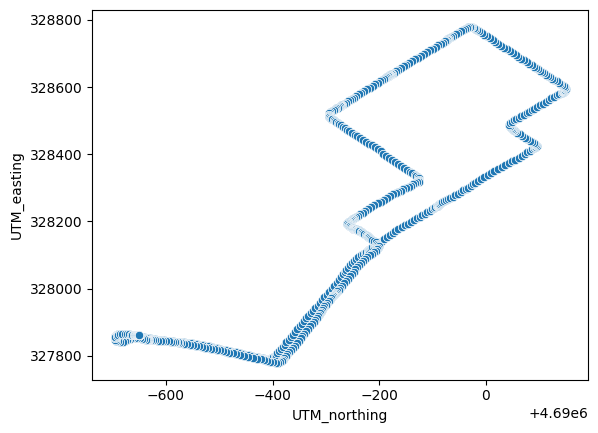

In [251]:
sns.scatterplot(x="UTM_northing", y="UTM_easting", data=df_gps)
plt.show()

In [252]:
df_imu.keys()

Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'imu.x', 'imu.y', 'imu.z', 'imu.w',
       'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z',
       'linear_acceleration.x', 'linear_acceleration.y',
       'linear_acceleration.z', 'mag_field.x', 'mag_field.y', 'mag_field.z',
       'raw_data'],
      dtype='object')

In [253]:
c_time = []
time = df_imu['header.stamp.secs'].to_numpy()
for i in range (len(time[2900:4500])):
  # z = df_gps['Header.stamp.secs'][i]
  # print(z)
  c_time.append(df_imu['header.stamp.secs'][i]-df_imu['header.stamp.secs'][0])
print(c_time)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 

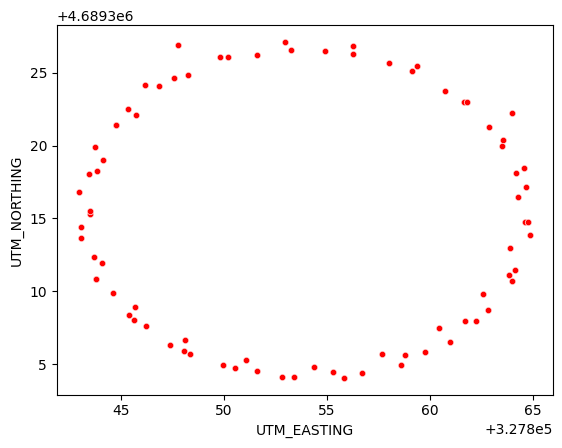

In [254]:
circle_utm_north = df_gps['UTM_northing'][290:450].to_numpy()
circle_utm_east = df_gps['UTM_easting'][290:450].to_numpy()
sns.scatterplot(x=circle_utm_east, y=circle_utm_north, color='red', s=20)
plt.xlabel('UTM_EASTING')
plt.ylabel('UTM_NORTHING')
plt.show()

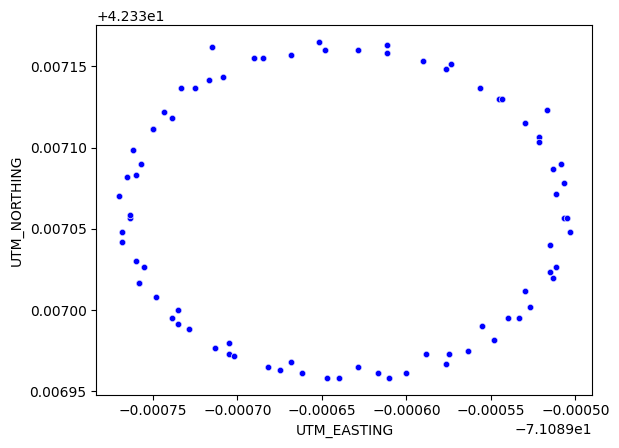

In [255]:
circle_utm_north = df_gps['Latitude'][290:450].to_numpy()
circle_utm_east = df_gps['Longitude'][290:450].to_numpy()
sns.scatterplot(x=circle_utm_east, y=circle_utm_north, color='blue', s=20)
plt.xlabel('UTM_EASTING')
plt.ylabel('UTM_NORTHING')
plt.show()

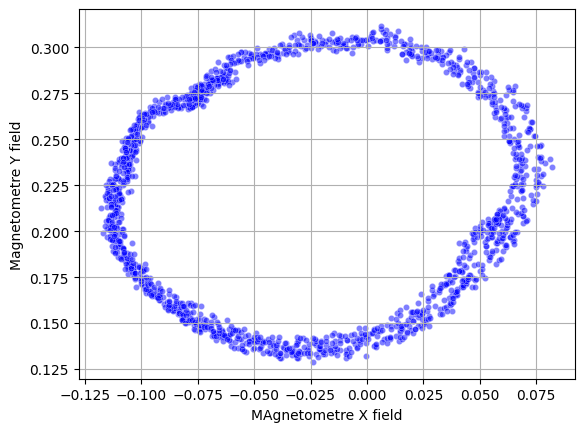

In [256]:
x_Mag_circle = df_imu['mag_field.x'][2900:4500]
y_Mag_circle = df_imu['mag_field.y'][2900:4500]
z_Mag_circle = df_imu['mag_field.z'][2900:4500]

plt.xlabel('MAgnetometre X field')
plt.ylabel('Magnetometre Y field')
plt.grid()
sns.scatterplot(x=x_Mag_circle, y=y_Mag_circle, color='blue', s=20,alpha = 0.5)
plt.show()

In [257]:
def fit_ellipse(x, y):
    
    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M

    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    coeffs =  np.concatenate((ak, T @ ak)).ravel()
    
    a = coeffs[0]
    b = coeffs[1] / 2
    c = coeffs[2]
    d = coeffs[3] / 2
    f = coeffs[4] / 2
    g = coeffs[5]

    den = b**2 - a*c
    if den > 0:
        raise ValueError('coeffs do not represent an ellipse: b^2 - 4ac must'
                         ' be negative!')

    # The location of the ellipse centre.
    x0, y0 = (c*d - b*f) / den, (a*f - b*d) / den

    num = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
    fac = np.sqrt((a - c)**2 + 4*b**2)
    # The semi-major and semi-minor axis lengths (these are not sorted).
    ap = np.sqrt(num / den / (fac - a - c))
    bp = np.sqrt(num / den / (-fac - a - c))

    # Sort the semi-major and semi-minor axis lengths but keep track of
    # the original relative magnitudes of width and height.
    width_gt_height = True
    if ap < bp:
        width_gt_height = False
        ap, bp = bp, ap

    # The eccentricity.
    r = (bp/ap)**2
    if r > 1:
        r = 1/r
    e = np.sqrt(1 - r)

    # The angle of anticlockwise rotation of the major-axis from x-axis.
    if b == 0:
        phi = 0 if a < c else np.pi/2
    else:
        phi = np.arctan((2.*b) / (a - c)) / 2
        if a > c:
            phi += np.pi/2
    if not width_gt_height:
        # Ensure that phi is the angle to rotate to the semi-major axis.
        phi += np.pi/2
    phi = phi % np.pi

    return x0, y0, ap, bp, e, phi


centre coordinates  [-0.021287868605412166, 0.22079112578296875]
width of the ellispse  0.09315529424465
height of the ellipse  0.07907855828350802
Roation along z  0.5248500707650532
1.1780095169499025


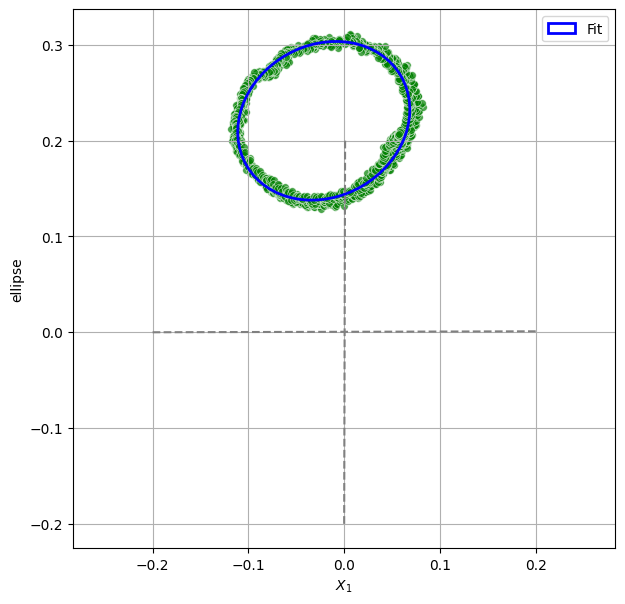

In [258]:
center_x, centre_y, width, height,ecc, phi = fit_ellipse(x_Mag_circle,y_Mag_circle)
centre = [center_x, centre_y]

print("centre coordinates ", centre)
print("width of the ellispse ",width)
print("height of the ellipse ", height)
print("Roation along z ", phi)
print(width/height)

fig = plt.figure(figsize=(7,7))
ax = plt.subplot()
ax.axis('equal')
sns.scatterplot(x=x_Mag_circle, y=y_Mag_circle, color='green', s=30,alpha = 0.7)
ellipse = Ellipse(
        xy=centre, width=2*width, height=2*height, angle= np.rad2deg(phi),
        edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
    )
ax.add_patch(ellipse)
plt.xlabel('$X_1$')
x = np.array([-0.20, 0.20])
y = np.array([0, 0.001])
sns.lineplot(x=x,y=y,color='gray',linestyle = '--')
sns.lineplot(x=y,y=x,color='gray',linestyle = '--')
plt.ylabel('ellipse')
plt.grid()
plt.legend()
plt.show()

In [259]:
R = np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
R1 = np.array([[np.cos(-phi), np.sin(-phi)], [-np.sin(-phi), np.cos(-phi)]])
scale  = width/height

new_x_mag_circle=[]
new_y_mag_circle=[]

for i in range(len(x_Mag_circle)):
    an1 = R@[x_Mag_circle[i+2900] - centre[0], y_Mag_circle[i+2900] - centre[1]]
    an2 = R1@[an1[0]/scale, an1[1]]

    new_x_mag_circle.append(an2[0])
    new_y_mag_circle.append(an2[1])

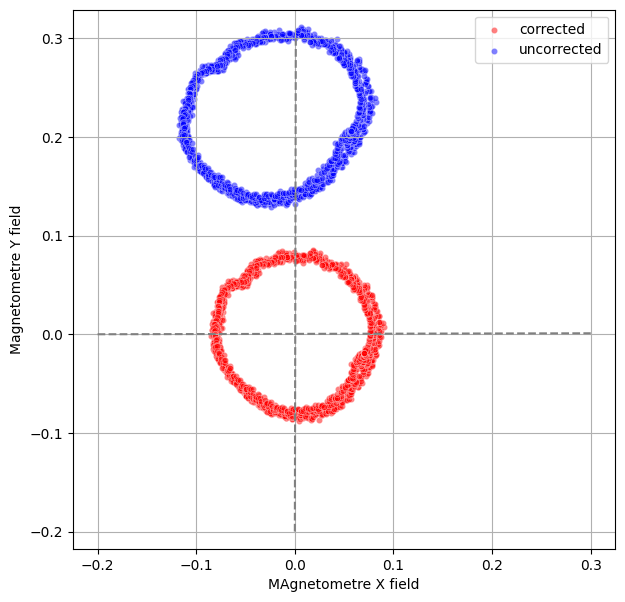

In [260]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot()
ax.axis('equal')
sns.scatterplot(x=new_x_mag_circle, y=new_y_mag_circle, label = 'corrected', color='red', s=20,alpha = 0.5)
# ellipse = Ellipse(
#         xy=centre, width=2*width, height=2*height, angle= np.rad2deg(phi),
#         edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
#     )
# ax.add_patch(ellipse)
x_Mag_circle = df_imu['mag_field.x'][2900:4500]
y_Mag_circle = df_imu['mag_field.y'][2900:4500]
z_Mag_circle = df_imu['mag_field.z'][2900:4500]

sns.scatterplot(x=x_Mag_circle, y=y_Mag_circle, color='blue', s=20,alpha = 0.5, label ='uncorrected')
x = np.array([-0.20, 0.30])
y = np.array([0, 0.001])
sns.lineplot(x=x,y=y,color='gray',linestyle = '--')
sns.lineplot(x=y,y=x,color='gray',linestyle = '--')
plt.xlabel('MAgnetometre X field')
plt.ylabel('Magnetometre Y field')
plt.grid()
plt.legend()
plt.show()

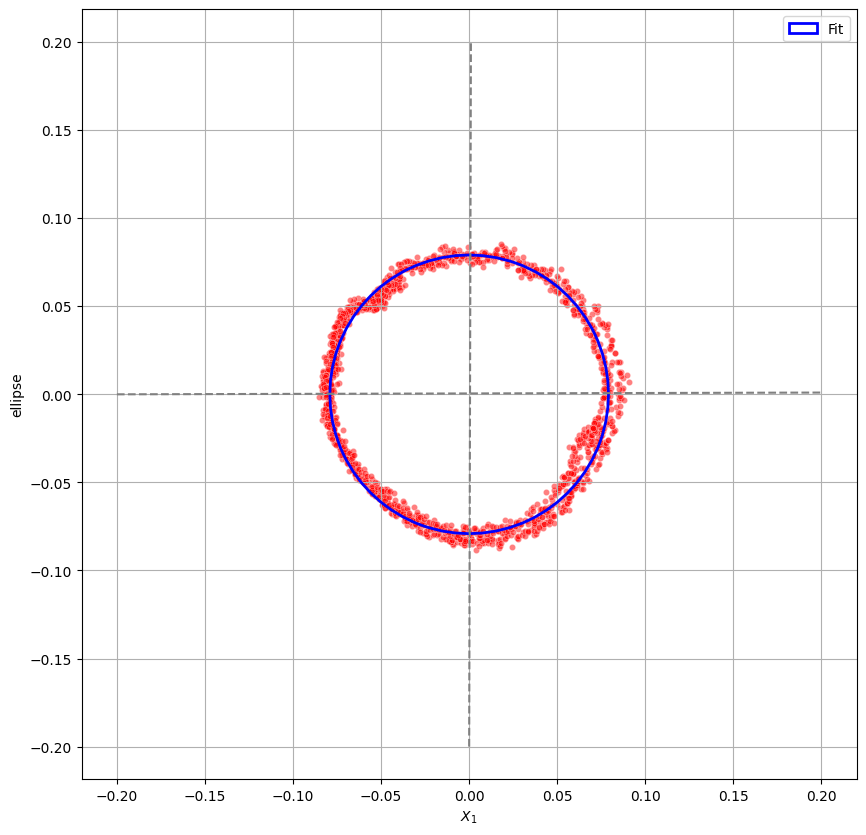

1.0000000000006983


In [261]:
x_new = np.array(new_x_mag_circle)
y_new = np.array(new_y_mag_circle)
center_x, centre_y, width, height,ecc, phi = fit_ellipse(x_new,y_new)
centre2 = [center_x, centre_y]
new_scale = width/height


fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.axis('equal')
sns.scatterplot(x=new_x_mag_circle, y=new_y_mag_circle, color='red', s=20,alpha = 0.5)
ellipse = Ellipse(
        xy=centre2, width=2*width, height=2*height, angle= np.rad2deg(phi),
        edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
    )
ax.add_patch(ellipse)
plt.xlabel('$X_1$')
plt.ylabel('ellipse')
x = np.array([-0.20, 0.20])
y = np.array([0, 0.001])
sns.lineplot(x=x,y=y,color='gray',linestyle = '--')
sns.lineplot(x=y,y=x,color='gray',linestyle = '--')

plt.grid()
plt.legend()
plt.show()
print(new_scale)

In [262]:
xmag_complete = df_imu['mag_field.x'].to_numpy()
ymag_complete = df_imu['mag_field.y'].to_numpy()
xmag_complete.shape
print(len(xmag_complete), len(ymag_complete))

25334 25334


In [263]:
scale

1.1780095169499025

In [264]:
new_x_magc = []
new_y_magc = []
print(scale)

# for i in range(len(xmag_complete)):
#     an3 = R@[xmag_complete[i] - centre[0], ymag_complete[i] - centre[1]]
#     r_mag_x = an3[0]
#     r_mag_y = an3[1]
#     scaled_x = r_mag_x/scale

#     an4 = R1@[scaled_x, r_mag_y]

#     rmag_x_final , rmag_y_final = an4

#     new_x_magc.append(rmag_x_final)
#     new_y_magc.append(rmag_y_final)

for i in range(len(xmag_complete)):
    an1 = R@[xmag_complete[i] - centre[0], ymag_complete[i] - centre[1]]
    an2 = R1@[an1[0]/scale, an1[1]]

    new_x_magc.append(an2[0])
    new_y_magc.append(an2[1])



1.1780095169499025


In [265]:
fs = 20
time = np.arange(0, len(df_imu) / fs, 1/fs)
start = 145*fs
stop = 225*fs

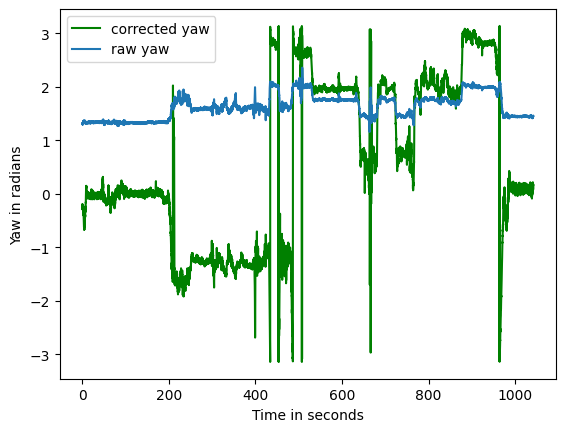

In [266]:
## prediction of yaw from the callibrated magnetometre data
######plotting raw yaw#######
raw_yaw=(np.arctan2(ymag_complete[4500:], xmag_complete[4500:]))
cal_yaw=(np.arctan2(new_y_magc[4500:], new_x_magc[4500:]))

plt.xlabel("Time in seconds")
plt.ylabel("Yaw in radians")
plt.plot(time[:20834],cal_yaw,label="corrected yaw", color = 'green')
plt.plot(time[:20834],raw_yaw,label="raw yaw")
plt.legend()

In [267]:
# time = time - time[0]

25334
20834


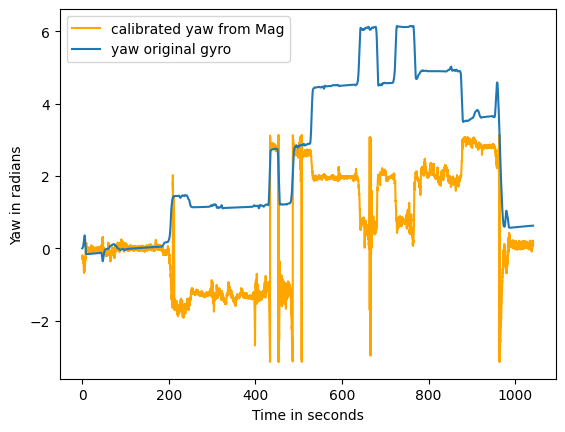

In [268]:
 ##raw yaw integrated from gyro vs calibrated yaw
time_new=time[4500:] - time[4500]
print(len(time))
gyro_yaw=df_imu["angular_velocity.z"].to_numpy()
gyro_yaw_new =gyro_yaw[4500:]
yaw = scipy.integrate.cumtrapz(gyro_yaw_new,time_new,initial=0)
print(len(yaw))
plt.xlabel("Time in seconds")
plt.ylabel("Yaw in radians")
plt.plot(time_new,cal_yaw,label="calibrated yaw from Mag", color = 'orange')
plt.plot(time_new,yaw,label="yaw original gyro")
plt.legend()

Text(0, 0.5, 'Yaw in radians')

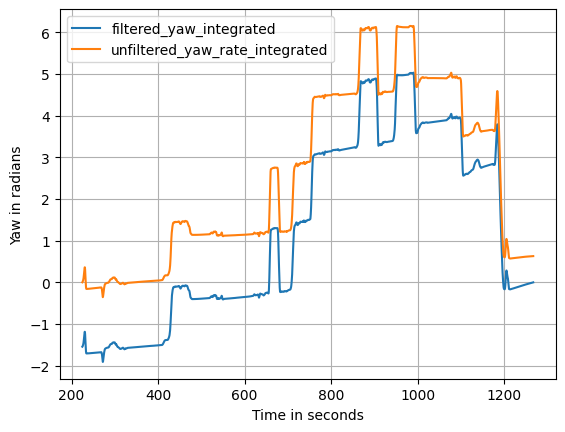

In [269]:
#low_pass magnetometer
lp_fc = 0.05
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
filtered_magnetometer = filtfilt(b, a, cal_yaw)
#sns.lineplot(y = filtered_magnetometer,x = time[4500:],label = 'filtered_yaw_integrated')


#high_pass yaw_rate/gyro
hp_fc = 0.000105
order = 4
nyq = 0.5 * fs
hp_fc_norm = hp_fc / nyq
b, a = butter(order, hp_fc_norm, btype='highpass')
filtered_yaw_integrated = filtfilt(b, a, yaw)

#seaborn.lineplot(y = filtered_magnetometer,x = time,label = 'filtered_magnetometer')
sns.lineplot(y = filtered_yaw_integrated,x = time[4500:],label = 'filtered_yaw_integrated')

#seaborn.lineplot(y = yaw_corrected_magnetometer,x = time,label = 'unfiltered_magnetometer')
sns.lineplot(y = yaw,x = time[4500:],label = 'unfiltered_yaw_rate_integrated')
plt.grid()
plt.xlabel("Time in seconds")
plt.ylabel("Yaw in radians")

Text(0, 0.5, 'Yaw in radians')

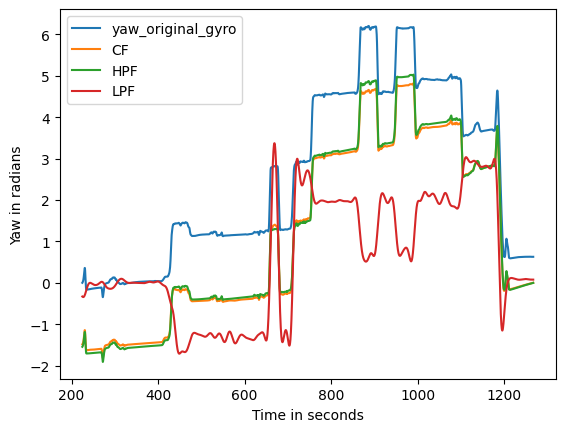

In [270]:
weight = 0.95
start2 = 4500
complimentary_filtered = weight*np.unwrap(filtered_yaw_integrated) + (1-weight)*np.unwrap(filtered_magnetometer)

x = df_imu['imu.x'].to_numpy()
y = df_imu['imu.y'].to_numpy()
z = df_imu['imu.z'].to_numpy()
w = df_imu['imu.w'].to_numpy()
q = np.array([x,y,z,w])
#q /= np.linalg.norm(q)

roll_original_gyro = np.unwrap(np.arctan2(2*(q[3]*q[0] + q[1]*q[2]), 1 - 2*(q[0]**2 + q[1]**2)))

pitch_original_gyro = np.unwrap(np.arcsin(2*(q[3]*q[1] - q[0]*q[2])))

yaw_original_gyro = np.unwrap(np.arctan2(2*(q[3]*q[2] + q[0]*q[1]), 1 - 2*(q[1]**2 + q[2]**2)))

yaw_original_gyro[start2:] = yaw_original_gyro[start2:] - yaw_original_gyro[start2]
sns.lineplot(y = yaw_original_gyro[start2:],x = time[start2:], label = 'yaw_original_gyro')
# sns.lineplot(y = pitch_original_gyro[start2:],x = time[start2:], label = 'yaw_original_gyro')
# sns.lineplot(y = roll_original_gyro[start2:],x = time[start2:], label = 'yaw_original_gyro')

sns.lineplot(y = complimentary_filtered,x = time[start2:],label = 'CF')
sns.lineplot(y = filtered_yaw_integrated,x = time[start2:],label = 'HPF')
sns.lineplot(y = filtered_magnetometer,x = time[start2:],label = 'LPF')
plt.xlabel("Time in seconds")
plt.ylabel("Yaw in radians")



<Axes: >

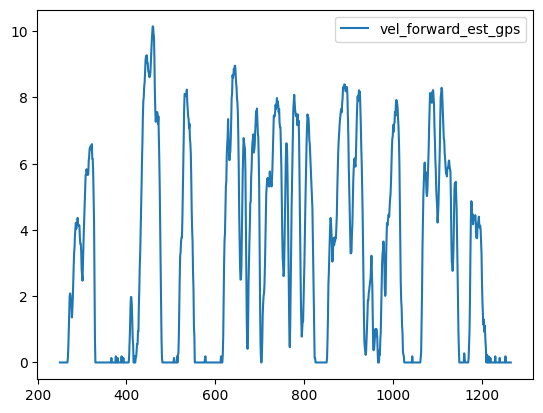

In [271]:
start3 = 5000
start3_gps = start3//10
start3_gps_time = start3_gps//2
fs_gps = 2
dt_gps = 1/fs_gps
time_gps = np.arange(0, len(df_gps) / fs_gps, 2*dt_gps)

dist_x = df_gps['UTM_easting'][start3_gps:]
dist_y = df_gps['UTM_northing'][start3_gps:]

vel_x = np.diff(dist_x)/(dt_gps*2)
vel_y = np.diff(dist_y)/(dt_gps*2)

vel_x = vel_x[1::2]
vel_x = np.append(vel_x,vel_x[-1])
vel_y = vel_y[1::2]
vel_y = np.append(vel_y,vel_y[-1])

vel_forward_est_gps = np.sqrt(vel_x**2 + vel_y**2)

sns.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")


<Axes: >

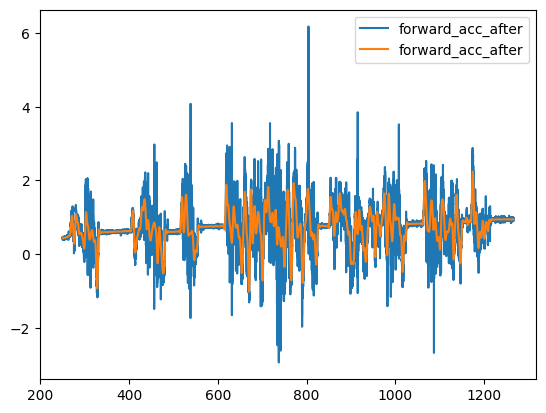

In [272]:
forward_acc = df_imu['linear_acceleration.x'][start3:].to_numpy()
sns.lineplot(y = forward_acc,x = time[start3:], label = 'forward_acc_after')
lp_fc = 0.2
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
forward_acc = filtfilt(b, a, forward_acc)

sns.lineplot(y = forward_acc,x = time[start3:], label = 'forward_acc_after')

In [273]:
forward_acc = forward_acc*np.cos(pitch_original_gyro[start3:]) + forward_acc*np.sin(pitch_original_gyro[start3:])
new_forward_acc = forward_acc.copy()


In [274]:
#high_pass yaw_rate/gyro
hp_fc = 0.001
order = 4
nyq = 0.5 * fs
hp_fc_norm = hp_fc / nyq
b, a = butter(order, hp_fc_norm, btype='highpass')
new_forward_acc = filtfilt(b, a, forward_acc)

new_forward_acc = detrend(new_forward_acc)


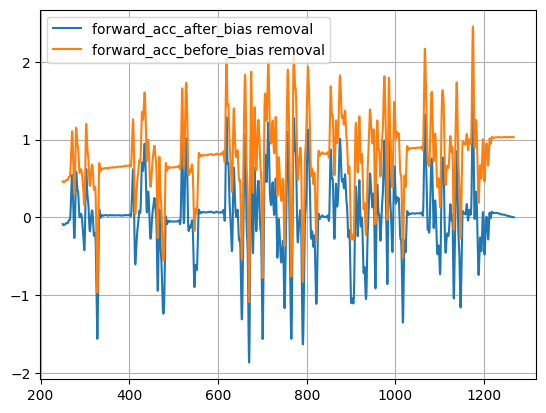

In [275]:
sns.lineplot(y = new_forward_acc,x = time[start3:], label = 'forward_acc_after_bias removal')
sns.lineplot(y = forward_acc,x = time[start3:], label = 'forward_acc_before_bias removal')
plt.grid()
#seaborn.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")

Text(0, 0.5, 'Velocity m/s')

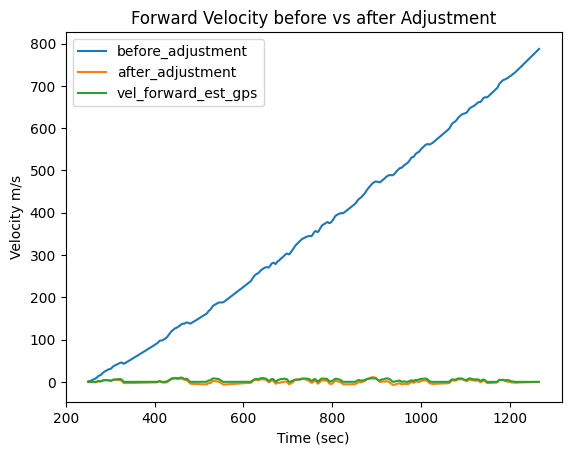

In [276]:
dt = 1/fs
new_forward_acc = new_forward_acc - new_forward_acc[0]
forward_velocity_after = np.zeros_like(new_forward_acc)
forward_velocity_after[0] = new_forward_acc[0]
forward_velocity_after[1:] = integrate.cumtrapz(new_forward_acc,dx=dt)

forward_velocity_before = np.zeros_like(forward_acc)
forward_velocity_before[0] = forward_acc[0]
forward_velocity_before[1:] = integrate.cumtrapz(forward_acc,dx=dt)

forward_velocity_after = detrend(forward_velocity_after)
sns.lineplot(y = forward_velocity_before,x = time[start3:], label = 'before_adjustment')
sns.lineplot(y = forward_velocity_after,x = time[start3:], label = 'after_adjustment')
sns.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")
# sns.lineplot(y = new_forward_acc,x = time[225*fs:], label = 'forward_acc')

plt.xlabel('Time (sec)')
plt.title("Forward Velocity before vs after Adjustment")
plt.ylabel("Velocity m/s")

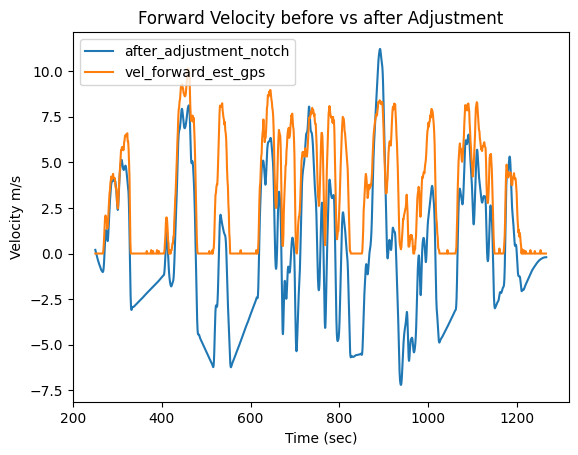

In [277]:
#Direct 
detrend_vel = detrend(forward_velocity_after)

sns.lineplot(y = detrend_vel,x = time[start3:], label = 'after_adjustment_notch')
#seaborn.lineplot(y = forward_velocity_after,x = time[start3:], label = 'after_adjustment')
sns.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")
plt.xlabel('Time (sec)')
plt.title("Forward Velocity before vs after Adjustment")
plt.ylabel("Velocity m/s")

forward_vel_final = forward_velocity_after

Text(0, 0.5, 'Velocity m/s')

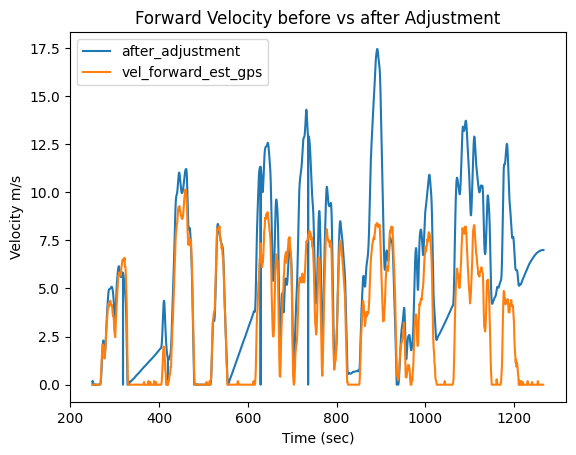

In [278]:
#Method 1
forward_vel_final = detrend_vel.copy()

for i in range(len(detrend_vel)):
    if(np.abs(new_forward_acc[i] - new_forward_acc[i-1]) < 0.01 and abs(new_forward_acc[i-1]) <0.0005):
        forward_vel_final[i-1] = 0
    elif (forward_vel_final[i] < 0):
        forward_vel_final[i:] = forward_vel_final[i:] - forward_vel_final[i]

sns.lineplot(y = forward_vel_final,x = time[start3:], label = 'after_adjustment')
#seaborn.lineplot(y = detrend_vel,x = time[start3:], label = 'after_adjustment')
sns.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")
#seaborn.lineplot(y = new_forward_acc,x = time[start3:], label = 'forward_acc')


plt.xlabel('Time (sec)')
plt.title("Forward Velocity before vs after Adjustment")
plt.ylabel("Velocity m/s")


Text(0, 0.5, 'Velocity m/s')

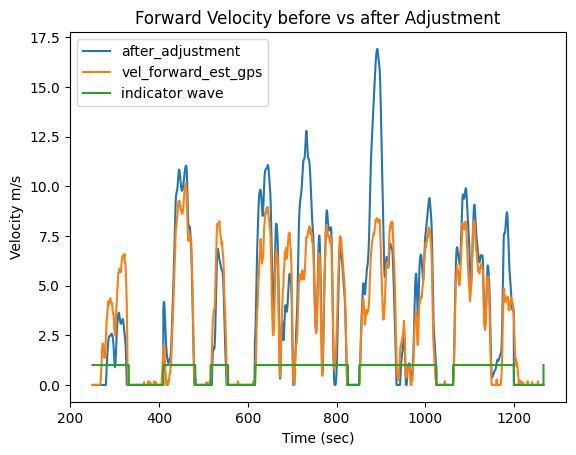

In [279]:
#Method 2
forward_vel_final = detrend_vel.copy()
import numpy as np

scale = np.ones_like(forward_vel_final)

diff_acc = np.diff(new_forward_acc)

slope_threshold = 0.01
window_size = 500
zero_slope_windows = []

for i in range(len(new_forward_acc)-window_size):
    window_diff = diff_acc[i:i+window_size]
    if np.all(np.abs(window_diff) < slope_threshold):
        zero_slope_windows.append((i, i+window_size))


for window in zero_slope_windows:
    scale[window[0]:window[1]] = 0

begin = 0 
end = 0
for i in range(len(scale)):
    if(scale[i] == 1):
        end = i 
    else:
        if end > begin:
            min = np.min(forward_vel_final[begin:end])
            forward_vel_final[begin-1:end] = forward_vel_final[begin-1:end] - min
            begin = i

forward_vel_final = forward_vel_final - 1.5

forward_vel_final[scale == 0] = 0
forward_vel_final[forward_vel_final < 0] = 0


sns.lineplot(y = forward_vel_final,x = time[start3:], label = 'after_adjustment')
# seaborn.lineplot(y = detrend_vel,x = time[start3:], label = 'after_adjustment')
sns.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")
sns.lineplot(y = scale,x = time[start3:], label = 'indicator wave')
#seaborn.lineplot(y = new_forward_acc,x = time[start3:], label = 'forward_acc')
#plt.ylim([-0.25, 0.25])

plt.xlabel('Time (sec)')
plt.title("Forward Velocity before vs after Adjustment")
plt.ylabel("Velocity m/s")


<Axes: >

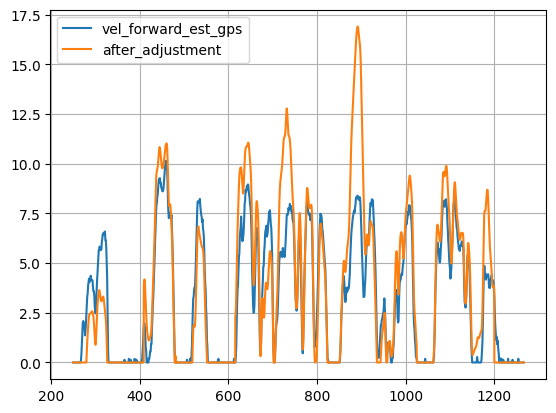

In [285]:
plt.grid()
sns.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")
#seaborn.lineplot(y = forward_velocity_before,x = time[start3:], label = 'before_adjustment')
sns.lineplot(y = forward_vel_final,x = time[start3:], label = 'after_adjustment')

<Axes: >

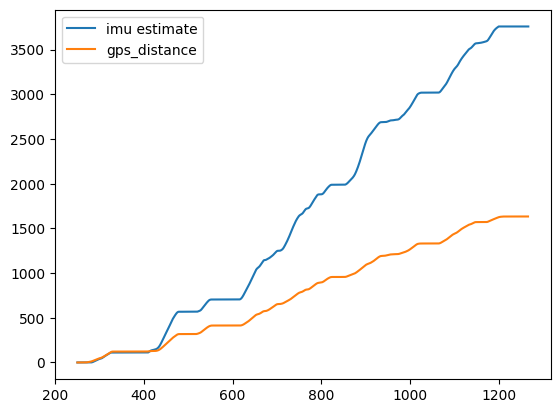

In [281]:
# DEAD RECKONING!!
distance_imu = np.zeros_like(forward_vel_final)
distance_imu[0] = forward_vel_final[0]
distance_imu[1:] = integrate.cumtrapz(forward_vel_final,dx=dt)
sns.lineplot(y = distance_imu,x = time[start3:], label = 'imu estimate')

distance_gps = np.zeros_like(vel_forward_est_gps)
distance_gps[0] = vel_forward_est_gps[0]
distance_gps[1:] = integrate.cumtrapz(vel_forward_est_gps,dx=dt_gps)
sns.lineplot(y = distance_gps,x = time_gps[start3_gps_time:], label = 'gps_distance')

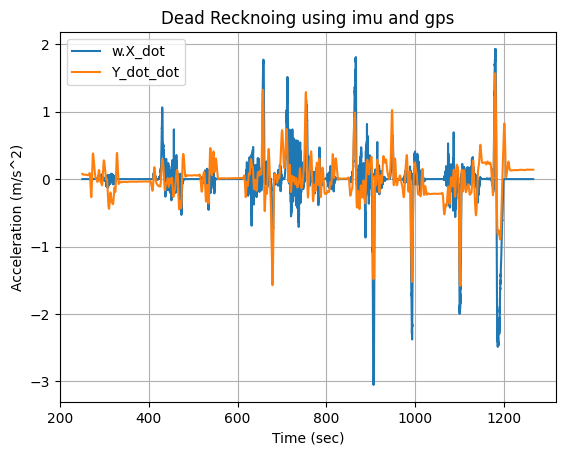

In [282]:
Y_dot_dot = df_imu["linear_acceleration.y"][start3:] - df_imu["linear_acceleration.y"][start3]
X_dot = forward_vel_final
W = df_imu["angular_velocity.z"][start3:]
wX_dot = W * X_dot

lp_fc = 0.2
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
Y_dot_dot_filtered = filtfilt(b, a, Y_dot_dot)

sns.lineplot(y = wX_dot,x = time[start3:],label = "w.X_dot")
sns.lineplot(y = detrend(Y_dot_dot_filtered),x = time[start3:], label = "Y_dot_dot")

plt.xlabel('Time (sec)')
plt.title("Dead Recknoing using imu and gps")
plt.ylabel("Acceleration (m/s^2)")
plt.grid()

(-437.63203903854304, 982.5859389743096, -87.75047713841147, 939.3315468680421)

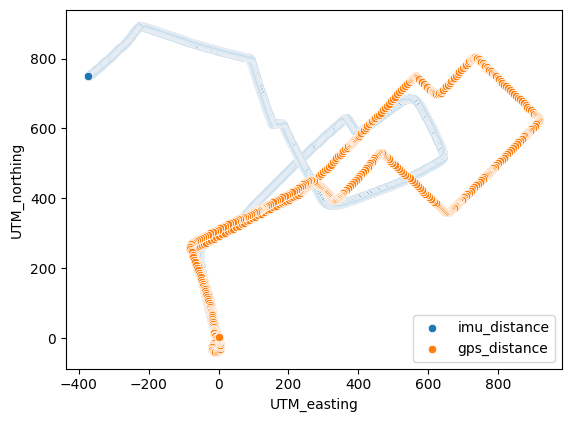

In [298]:
Cf_yaw = yaw_original_gyro[5000:]
Cf_yaw = complimentary_filtered + 0.4

Vn = np.cos(Cf_yaw[:20334])*forward_vel_final  - np.sin(Cf_yaw[:20334])*forward_vel_final
Ve = np.sin(Cf_yaw[:20334])*forward_vel_final  + np.cos(Cf_yaw[:20334])*forward_vel_final

Xe = np.zeros_like(Ve)
Xe[0] = Ve[0]
Xe[1:] = integrate.cumtrapz(Ve,dx=dt)
Xe = Xe/2 #scaled by 2
Xn = np.zeros_like(Vn)
Xn[0] = Vn[0]
Xn[1:] = integrate.cumtrapz(Vn,dx=dt)
Xn = Xn/2 #

dist_x = df_gps['UTM_easting'][start3_gps:]
dist_y = df_gps['UTM_northing'][start3_gps:]
dist_x = dist_x - dist_x[500]
dist_y = dist_y - dist_y[500]

sns.scatterplot(y = Xn,x = Xe, label = 'imu_distance')
sns.scatterplot(y = dist_y,x = dist_x, label = 'gps_distance')
plt.axis('scaled')


In [295]:
forward_vel_final.shape
Cf_yaw.shape

(20834,)

In [ ]:
angVel = df_imu["angular_velocity.z"][5000:]
imuVel = forward_vel_final
wXdot = angVel*imuVel
omega = []
for i in range(5000,len(angVel)-1):
    omega.append((angVel[i + 1] - angVel[i])/(time_step[i+1] - time_step[i]))
    # print(len(linAccely))
    # print(len(wXdot))
    # print(len(omega))
    Xc = (linAccely - wXdot)/omega
    print(np.mean(Xc))